In [6]:
import pandas as pd
import numpy as np

# Load the data (adjust path if needed)
data = pd.read_csv('../garments_worker_productivity.csv')
print(data.head())
print(data.columns)

       date   quarter  department       day  team  targeted_productivity  \
0  1/1/2015  Quarter1      sweing  Thursday     8                   0.80   
1  1/1/2015  Quarter1  finishing   Thursday     1                   0.75   
2  1/1/2015  Quarter1      sweing  Thursday    11                   0.80   
3  1/1/2015  Quarter1      sweing  Thursday    12                   0.80   
4  1/1/2015  Quarter1      sweing  Thursday     6                   0.80   

     smv     wip  over_time  incentive  idle_time  idle_men  \
0  26.16  1108.0       7080         98        0.0         0   
1   3.94     NaN        960          0        0.0         0   
2  11.41   968.0       3660         50        0.0         0   
3  11.41   968.0       3660         50        0.0         0   
4  25.90  1170.0       1920         50        0.0         0   

   no_of_style_change  no_of_workers  actual_productivity  
0                   0           59.0             0.940725  
1                   0            8.0        

In [7]:
# Check for missing values
print(data.isnull().sum())
print("\nShape before dropping columns with too many nulls:", data.shape)

# Drop columns with more than 20% missing values (if any)
data = data.dropna(axis=1, thresh=len(data)*0.8)
print("\nShape after dropping columns with too many nulls:", data.shape)

# Fill remaining missing values
for col in data.select_dtypes(include='O').columns:
    data[col] = data[col].fillna(data[col].mode()[0])
for col in data.select_dtypes(include=[np.number]).columns:
    data[col] = data[col].fillna(data[col].mean())

# Check again
print("\nMissing values after filling:")
print(data.isnull().sum())

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

Shape before dropping columns with too many nulls: (1197, 15)

Shape after dropping columns with too many nulls: (1197, 14)

Missing values after filling:
date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64


In [8]:
# Convert 'date' to datetime and extract 'month'
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].dt.month

# Drop the original 'date' column
data = data.drop('date', axis=1)

# Show the first few rows and columns
print(data.head())
print("\nColumns after date processing:", data.columns.tolist())

    quarter  department       day  team  targeted_productivity    smv  \
0  Quarter1      sweing  Thursday     8                   0.80  26.16   
1  Quarter1  finishing   Thursday     1                   0.75   3.94   
2  Quarter1      sweing  Thursday    11                   0.80  11.41   
3  Quarter1      sweing  Thursday    12                   0.80  11.41   
4  Quarter1      sweing  Thursday     6                   0.80  25.90   

   over_time  incentive  idle_time  idle_men  no_of_style_change  \
0       7080         98        0.0         0                   0   
1        960          0        0.0         0                   0   
2       3660         50        0.0         0                   0   
3       3660         50        0.0         0                   0   
4       1920         50        0.0         0                   0   

   no_of_workers  actual_productivity  month  
0           59.0             0.940725      1  
1            8.0             0.886500      1  
2          

In [9]:
from sklearn.preprocessing import LabelEncoder

# Encode 'quarter', 'department', and 'day'
for col in ['quarter', 'department', 'day']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

print(data.head())
print("\nData types after encoding:\n", data.dtypes)

   quarter  department  day  team  targeted_productivity    smv  over_time  \
0        0           2    3     8                   0.80  26.16       7080   
1        0           1    3     1                   0.75   3.94        960   
2        0           2    3    11                   0.80  11.41       3660   
3        0           2    3    12                   0.80  11.41       3660   
4        0           2    3     6                   0.80  25.90       1920   

   incentive  idle_time  idle_men  no_of_style_change  no_of_workers  \
0         98        0.0         0                   0           59.0   
1          0        0.0         0                   0            8.0   
2         50        0.0         0                   0           30.5   
3         50        0.0         0                   0           30.5   
4         50        0.0         0                   0           56.0   

   actual_productivity  month  
0             0.940725      1  
1             0.886500      1  
2 

In [10]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data.drop(['actual_productivity'], axis=1)
y = data['actual_productivity']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Feature columns:", X.columns.tolist())
print("Number of features:", len(X.columns))
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Feature columns: ['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'month']
Number of features: 13
Train shape: (957, 13)
Test shape: (240, 13)


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

# XGBoost
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
pred_xgb = xgb.predict(X_test)

# Model Comparison
print('Model Comparison:')
models = ['Linear Regression', 'Random Forest', 'XGBoost']
preds = [pred_lr, pred_rf, pred_xgb]
for name, pred in zip(models, preds):
    print(f'--- {name} ---')
    print('MAE:', mean_absolute_error(y_test, pred))
    print('MSE:', mean_squared_error(y_test, pred))
    print('R2 Score:', r2_score(y_test, pred))
    print()

Model Comparison:
--- Linear Regression ---
MAE: 0.10750872834094855
MSE: 0.02160847942846644
R2 Score: 0.18619690531408462

--- Random Forest ---
MAE: 0.0668503848365833
MSE: 0.011728750658163357
R2 Score: 0.5582801828323646

--- XGBoost ---
MAE: 0.07273557406922082
MSE: 0.01505318533673072
R2 Score: 0.4330777020906966



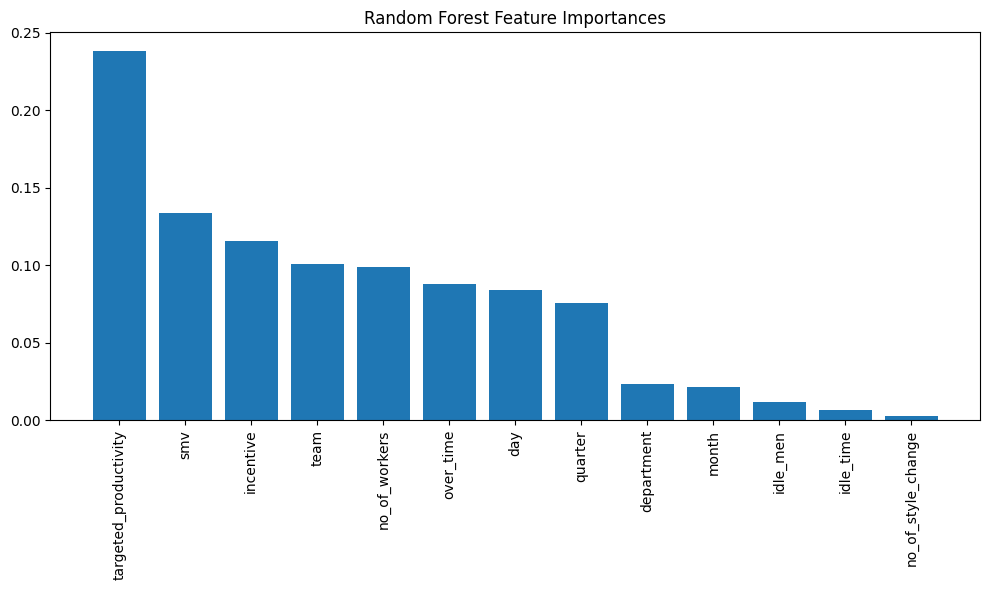

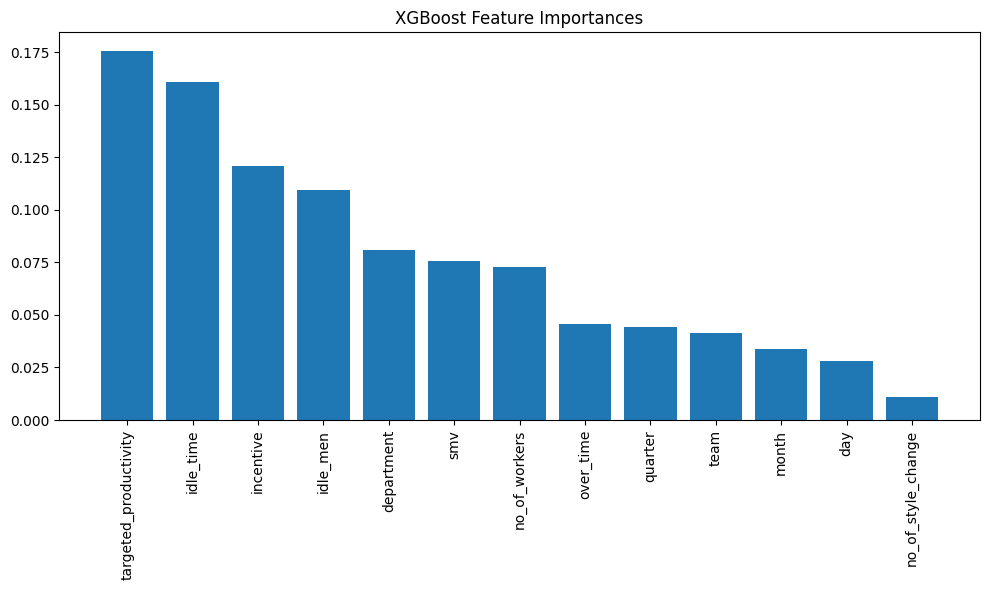

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Random Forest Feature Importance
importances_rf = rf.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]
plt.figure(figsize=(10,6))
plt.title('Random Forest Feature Importances')
plt.bar(range(X.shape[1]), importances_rf[indices_rf], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices_rf], rotation=90)
plt.tight_layout()
plt.show()

# XGBoost Feature Importance
importances_xgb = xgb.feature_importances_
indices_xgb = np.argsort(importances_xgb)[::-1]
plt.figure(figsize=(10,6))
plt.title('XGBoost Feature Importances')
plt.bar(range(X.shape[1]), importances_xgb[indices_xgb], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices_xgb], rotation=90)
plt.tight_layout()
plt.show()

In [13]:
import pickle

# Save the Random Forest model
with open('../gwp.pkl', 'wb') as f:
    pickle.dump(rf, f)

print("Random Forest model saved as gwp.pkl")

Random Forest model saved as gwp.pkl
